In [1]:
# This notebook is for starting to explore the models offered by SciKit-Learn

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [3]:
# Split dataset into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,  # Leave 30% for testing
                                                    random_state=1,
                                                    # Statically determined for reproducibility
                                                    stratify=y)
                                                    # Ensure that the percentages in y are roughly replicated
                                                    # in the train and test dataset. This corrects for
                                                    # imbalanced populations.

# Verify that the proportions of class labels have been maintained in the train/test splits

print("Label counts in y:", np.bincount(y))
print("Label counts in y_train:", np.bincount(y_train))
print("Label counts in y_test:", np.bincount(y_test))


Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [4]:
# Standardize the input data for better handling by the classifiers

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
# IMPORTANT! Use the same scaling parameters for train and test to make them comparable!
X_test_std = sc.transform(X_test)

In [5]:
# Use the Perceptron classifier included in SKLearn

from sklearn.linear_model import Perceptron

# Use "max_iter" instead of "n_iter", the latter is deprecated and will become erroneous soon.

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: {}".format((y_test != y_pred).sum()))

Misclassified samples: 3


In [7]:
# Obtain standard metrics of accuracy

from sklearn.metrics import accuracy_score
print("Accuracy: {:0.2f}".format(accuracy_score(y_test, y_pred)))
print("Accuracy: {:0.2f}".format(ppn.score(X_test_std, y_test)))

Accuracy: 0.93
Accuracy: 0.93


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = "red blue lightgreen gray cyan".split()
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=colors[idx], marker=markers[idx], label=cl,
                   edgecolor="black")
        # highlight the test samples
        if test_idx:
            # Plot all samples
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c="", edgecolor="black", alpha=1.0,
                       linewidth=1, marker="o", s=100, label="test set")
        else:
            pass
        continue
        
    return

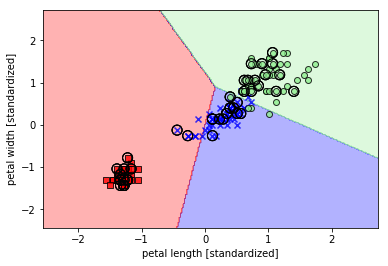

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
# plt.legend(loc="upper left")
plt.show()